In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
filepath1='/content/drive/MyDrive/Hospitality/dim_date.csv'
filepath2='/content/drive/MyDrive/Hospitality/dim_hotels.csv'
filepath3='/content/drive/MyDrive/Hospitality/dim_rooms.csv'
filepath4='/content/drive/MyDrive/Hospitality/fact_aggregated_bookings.csv'
filepath5='/content/drive/MyDrive/Hospitality/fact_bookings.csv'

In [ ]:
dim_date=pd.read_csv(filepath1)
dim_hotels=pd.read_csv(filepath2)
dim_rooms=pd.read_csv(filepath3)
fact_aggregate=pd.read_csv(filepath4)
fact_bookings=pd.read_csv(filepath5)

In [ ]:
dim_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,22-May,W 19,weekend
1,2022-05-02,22-May,W 19,weekeday
2,2022-05-03,22-May,W 19,weekeday
3,2022-05-04,22-May,W 19,weekeday
4,2022-05-05,22-May,W 19,weekeday


In [ ]:
dim_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
dim_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
fact_aggregate.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [ ]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


# Data Cleaning

In [ ]:
fact_aggregate.isna().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [ ]:
dim_date.dtypes

date        object
mmm yy      object
week no     object
day_type    object
dtype: object

In [ ]:
fact_bookings.isna().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [ ]:
fact_bookings['ratings_given']=fact_bookings['ratings_given'].fillna(0)

# Data Type change

In [ ]:
dim_date['date']=pd.to_datetime(dim_date['date'])
fact_aggregate['check_in_date']=pd.to_datetime(fact_aggregate['check_in_date'])
fact_bookings['booking_date']=pd.to_datetime(fact_bookings['booking_date'])
fact_bookings['check_in_date']=pd.to_datetime(fact_bookings['check_in_date'])
fact_bookings['checkout_date']=pd.to_datetime(fact_bookings['checkout_date'])

In [ ]:
dim_date=dim_date[dim_date['week no']!='W 32']
dim_date

,date,mmm yy,week no,day_type
0,2022-05-01,22-May,W 19,weekend
1,2022-05-02,22-May,W 19,weekeday
2,2022-05-03,22-May,W 19,weekeday
3,2022-05-04,22-May,W 19,weekeday
4,2022-05-05,22-May,W 19,weekeday
...,...,...,...,...
86,2022-07-26,22-Jul,W 31,weekeday
87,2022-07-27,22-Jul,W 31,weekeday
88,2022-07-28,22-Jul,W 31,weekeday
89,2022-07-29,22-Jul,W 31,weekeday


# ** Revenue Analysis**

In [ ]:
df=pd.merge(dim_hotels,fact_bookings,how='left',on='property_id')
df.head(5)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT11,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT13,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,16558,Atliq Grands,Luxury,Delhi,May012216558RT14,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
# Hotelwise Revenue
pd.merge(dim_hotels,fact_bookings,how='left',on='property_id').groupby(['property_name']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'revenue'})

,revenue
property_name,
Atliq Bay,260051178
Atliq Blu,260855522
Atliq City,285811939
Atliq Exotica,320312468
Atliq Grands,211532764
Atliq Palace,304081863
Atliq Seasons,66125495


Text(0.5, 1.0, 'Hotelwise Revenue')

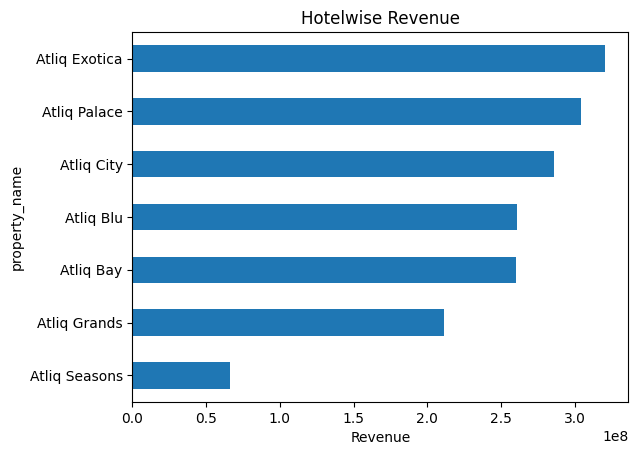

In [ ]:
pd.merge(dim_hotels,fact_bookings,how='left',on='property_id').groupby(['property_name']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'revenue'}).sort_values(by='revenue').plot(kind='barh',legend=False)
plt.xlabel('Revenue')
plt.title('Hotelwise Revenue')

In [ ]:
# Citywise Revenue
df.groupby(['city']).agg({'revenue_realized':'sum'})

,revenue_realized
city,
Bangalore,420397050
Delhi,294500318
Hyderabad,325232870
Mumbai,668640991


Text(0.5, 1.0, 'Citywiswe Revenue')

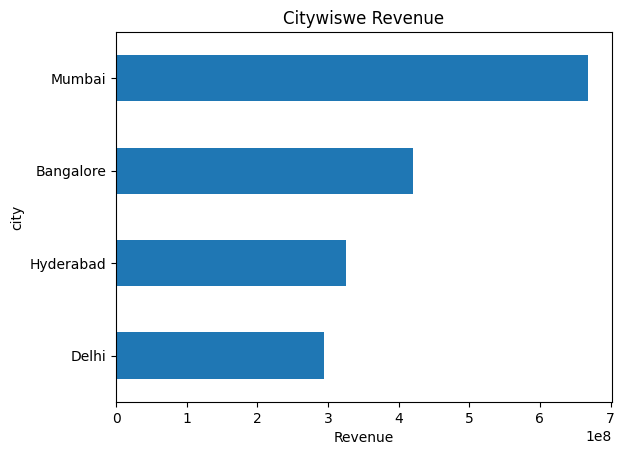

In [ ]:
df.groupby(['city']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'revenue'}).sort_values(by='revenue').plot(kind='barh',legend=False)
plt.xlabel('Revenue')
plt.title('Citywiswe Revenue')

In [ ]:
# Room class wise Reveue
pd.merge(dim_rooms,df,how='left',left_on='room_id',right_on='room_category').groupby(['room_class']).agg({'revenue_realized':'sum'})

,revenue_realized
room_class,
Elite,560271204
Premium,462166344
Presidential,376752786
Standard,309580895


Text(0.5, 1.0, 'Room class wise Revenue')

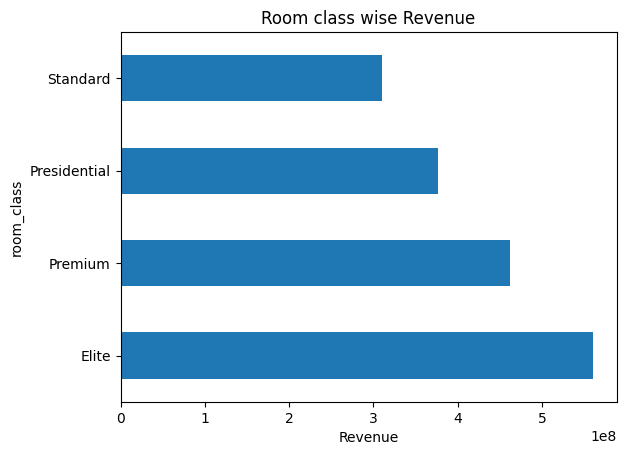

In [ ]:
pd.merge(dim_rooms,df,how='left',left_on='room_id',right_on='room_category').groupby(['room_class']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'revenue'}).plot(kind='barh',legend=False)
plt.xlabel('Revenue')
plt.title('Room class wise Revenue')

In [ ]:
# Revenue Trend
x=pd.merge(dim_date,df,how='left',left_on='date',right_on='check_in_date').groupby(['week no','property_name']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'revenue'}).reset_index()

Text(0.5, 1.0, 'Hotelwise Weekly Revenue Trend')

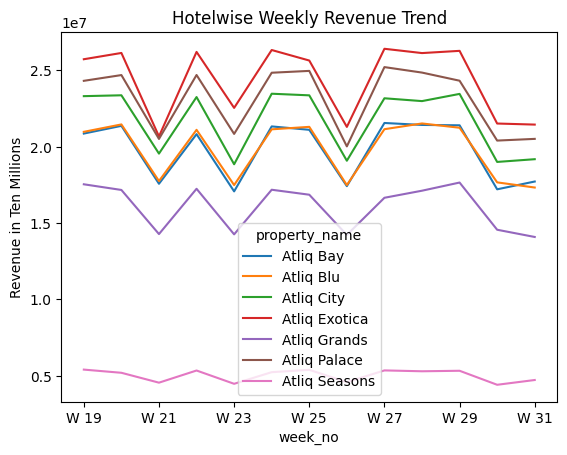

In [ ]:
pivot_data=x.pivot(index='week no',columns='property_name',values='revenue')
pivot_data
pivot_data.plot(kind='line')
plt.xlabel('week_no')
plt.ylabel('Revenue in Ten Millions')
plt.title('Hotelwise Weekly Revenue Trend')

Text(0.5, 1.0, 'Week wise Revenue Trend')

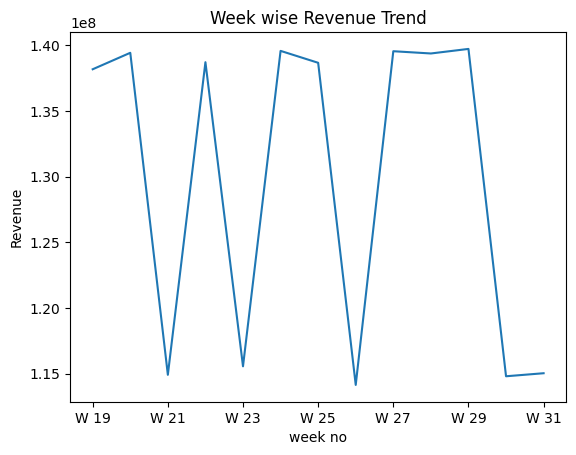

In [ ]:
pd.merge(dim_date,df,how='left',left_on='date',right_on='check_in_date').groupby(['week no']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'revenue'}).plot(kind='line',legend=False)
plt.ylabel('Revenue')
plt.title('Week wise Revenue Trend')

# **Booking Analysis**

In [ ]:
# Hotelwise bookings
df.groupby(['property_name']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Toatal Bookings'}).sort_values(by='Toatal Bookings')

,Toatal Bookings
property_name,
Atliq Seasons,3982
Atliq Grands,17035
Atliq Bay,21389
Atliq Blu,21795
Atliq City,23323
Atliq Exotica,23441
Atliq Palace,23625


Text(0.5, 1.0, 'Hotel wise Bookings')

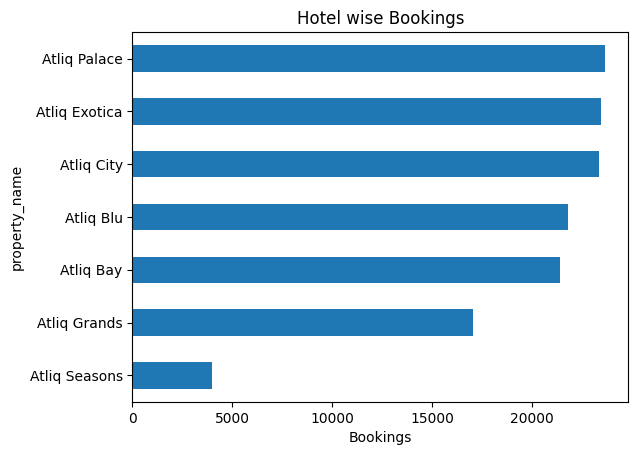

In [ ]:
df.groupby(['property_name']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Toatal Bookings'}).sort_values(by='Toatal Bookings').plot(kind='barh',legend=False)
plt.xlabel('Bookings')
plt.title('Hotel wise Bookings')

In [ ]:
# Hotelwise cancellation percentage, No Show Percentage, Check out percentage
df1=df.groupby(['property_name','booking_status']).agg({'booking_id':'nunique'}).reset_index().pivot(index='property_name',columns='booking_status',values='booking_id')
df2=df.groupby(['property_name']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Toatal Bookings'})
df3=pd.merge(df1,df2,how='inner',on='property_name')
df3

,Cancelled,Checked Out,No Show,Toatal Bookings
property_name,,,,
Atliq Bay,5314,14965,1110,21389
Atliq Blu,5373,15267,1155,21795
Atliq City,5811,16365,1147,23323
Atliq Exotica,5713,16557,1171,23441
Atliq Grands,4273,11914,848,17035
Atliq Palace,5949,16532,1144,23625
Atliq Seasons,987,2811,184,3982


In [ ]:
df3['cancellation percentage']=df3['Cancelled']*100/df3['Toatal Bookings']
df3['No Show Percentage']=df3['No Show']*100/df3['Toatal Bookings']
df3['Checked Out Percentage']=df3['Checked Out']*100/df3['Toatal Bookings']

In [ ]:
df3[['Checked Out Percentage','No Show Percentage','cancellation percentage']].sort_values(by='Checked Out Percentage',ascending=False)

,Checked Out Percentage,No Show Percentage,cancellation percentage
property_name,,,
Atliq Exotica,70.632652,4.995521,24.371827
Atliq Seasons,70.592667,4.620794,24.786539
Atliq City,70.166788,4.917892,24.915320
Atliq Blu,70.048176,5.299381,24.652443
Atliq Palace,69.976720,4.842328,25.180952
Atliq Bay,69.965870,5.189583,24.844546
Atliq Grands,69.938362,4.977986,25.083651


<Axes: ylabel='property_name'>

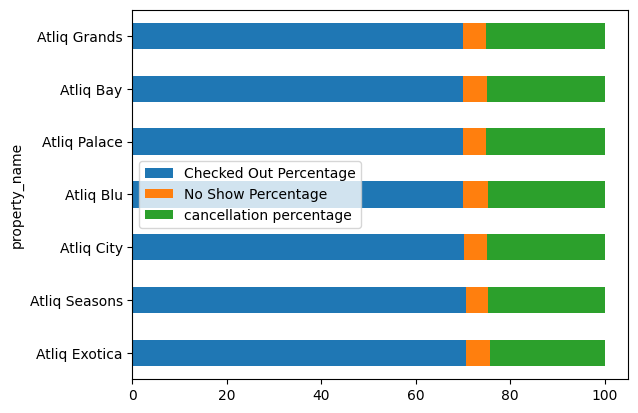

In [ ]:
df3[['Checked Out Percentage','No Show Percentage','cancellation percentage']].sort_values(by='Checked Out Percentage',ascending=False).reset_index().plot(x='property_name',kind='barh',stacked=True)

In [ ]:
# Booking platform wise bookings
fact_bookings.groupby(['booking_platform']).agg({'booking_id':'nunique'})

,booking_id
booking_platform,
direct offline,6755
direct online,13379
journey,8106
logtrip,14756
makeyourtrip,26898
others,55066
tripster,9630


Text(0.5, 1.0, 'Platform wise bookings')

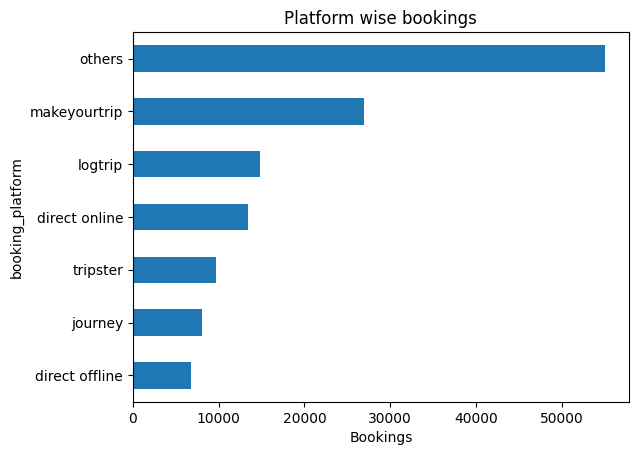

In [ ]:
fact_bookings.groupby(['booking_platform']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total Bookings'}).sort_values(by='Total Bookings').plot(kind='barh',legend=False)
plt.xlabel('Bookings')
plt.title('Platform wise bookings')

In [ ]:
# Weekly booking Trend
y=pd.merge(dim_date,df,how='left',left_on='date',right_on='check_in_date')
y1=y.groupby(['week no','property_name']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total bookings'}).reset_index()
y2=y1.pivot(index='week no',columns='property_name',values='Total bookings')

Text(0.5, 1.0, 'Hotelwise Booking Trend')

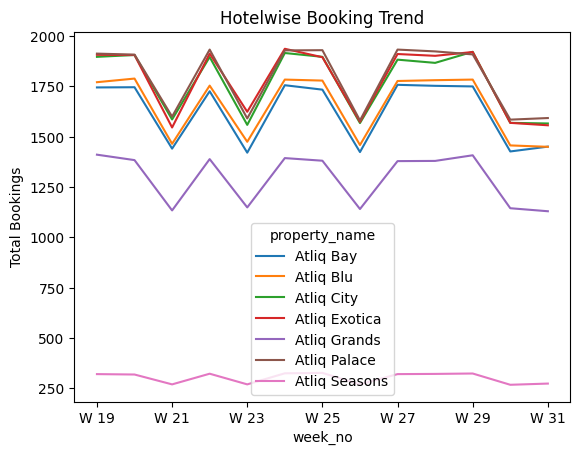

In [ ]:
y2.plot(kind='line')
plt.xlabel('week_no')
plt.ylabel('Total Bookings')
plt.title('Hotelwise Booking Trend')

In [ ]:
y4=y.groupby(['week no']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Current week bookings'})
y4

,Current week bookings
week no,
W 19,10965
W 20,10958
W 21,9042
W 22,10934
W 23,9089
W 24,11041
W 25,10943
W 26,9017
W 27,10962


Text(0.5, 1.0, 'Weekly bookings Trend')

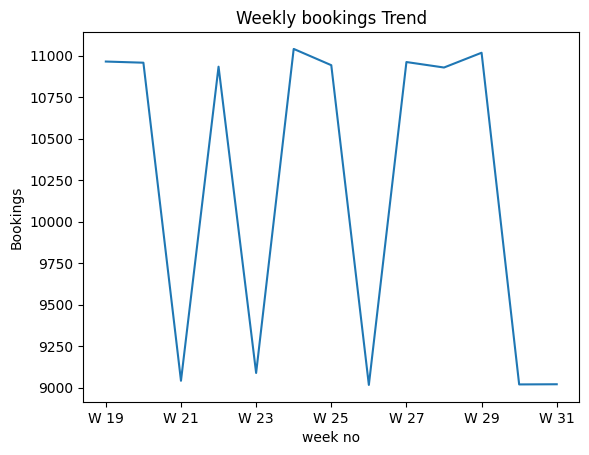

In [ ]:
y4.plot(kind='line',legend=False)
plt.ylabel('Bookings')
plt.title('Weekly bookings Trend')

In [ ]:
y4['prev week bookings']=y4['Current week bookings'].shift(1)
y4

,Current week bookings,prev week bookings
week no,,
W 19,10965,NaN
W 20,10958,10965.0
W 21,9042,10958.0
W 22,10934,9042.0
W 23,9089,10934.0
W 24,11041,9089.0
W 25,10943,11041.0
W 26,9017,10943.0
W 27,10962,9017.0


Text(0.5, 1.0, 'Hotelwise Booking Trend')

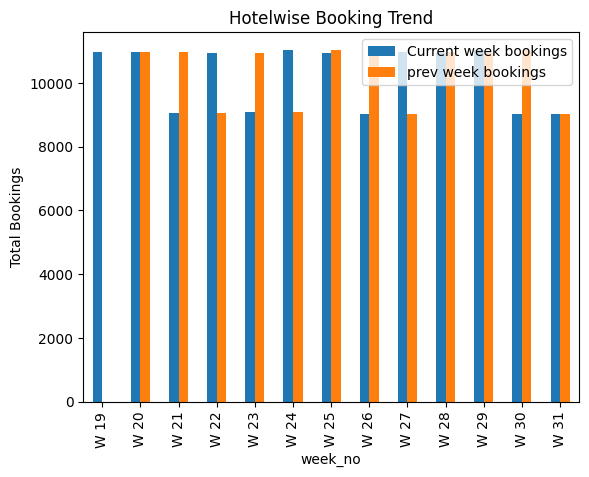

In [ ]:
y4.plot(kind='bar')
plt.xlabel('week_no')
plt.ylabel('Total Bookings')
plt.title('Hotelwise Booking Trend')

# ** Occupancy Analysis**

In [ ]:
# Hotel Ratings
df.groupby(['property_name']).agg({'ratings_given':'mean'})

,ratings_given
property_name,
Atliq Bay,3.708929
Atliq Blu,3.959650
Atliq City,3.694799
Atliq Exotica,3.619241
Atliq Grands,3.099876
Atliq Palace,3.749545
Atliq Seasons,2.294856


Text(0.5, 1.0, 'Hotel wise Average Ratings')

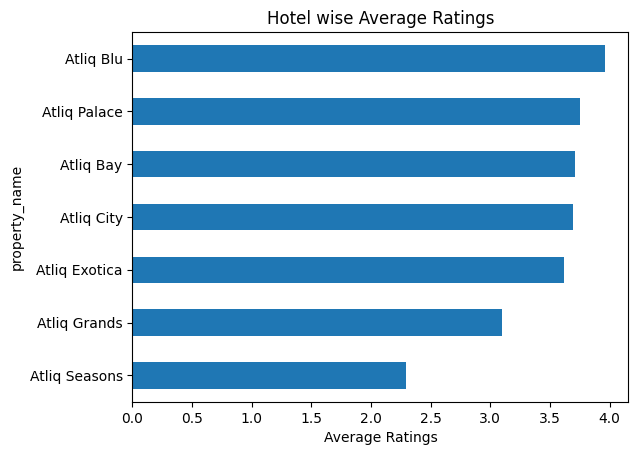

In [ ]:
df.groupby(['property_name']).agg({'ratings_given':'mean'}).sort_values(by='ratings_given').plot(kind='barh',legend=False)
plt.xlabel('Average Ratings')
plt.title('Hotel wise Average Ratings')

In [ ]:
a=pd.merge(dim_hotels,fact_aggregate,how='left',on='property_id')
b=pd.merge(dim_date,a,how='left',left_on='date',right_on='check_in_date')
b.head()

,date,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity
0,2022-05-01,22-May,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT1,18,19
1,2022-05-01,22-May,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT2,21,22
2,2022-05-01,22-May,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT3,8,8
3,2022-05-01,22-May,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT4,3,3
4,2022-05-01,22-May,W 19,weekend,16559,Atliq Exotica,Luxury,Mumbai,2022-05-01,RT1,25,30


In [ ]:
hotel_occ=b.groupby(['property_name']).agg({'successful_bookings':'sum','capacity':'sum'})
hotel_occ['occupancy percentage']=hotel_occ['successful_bookings']*100/hotel_occ['capacity']
hotel_occ.sort_values(by='occupancy percentage')

,successful_bookings,capacity,occupancy percentage
property_name,,,
Atliq Seasons,3934,8827,44.567803
Atliq Grands,16825,32032,52.525599
Atliq Exotica,23162,40495,57.197185
Atliq Bay,21132,36218,58.346678
Atliq City,23032,38766,59.412888
Atliq Palace,23329,38948,59.897812
Atliq Blu,21525,34762,61.921063


Text(0.5, 1.0, 'Hotelwise occupancy')

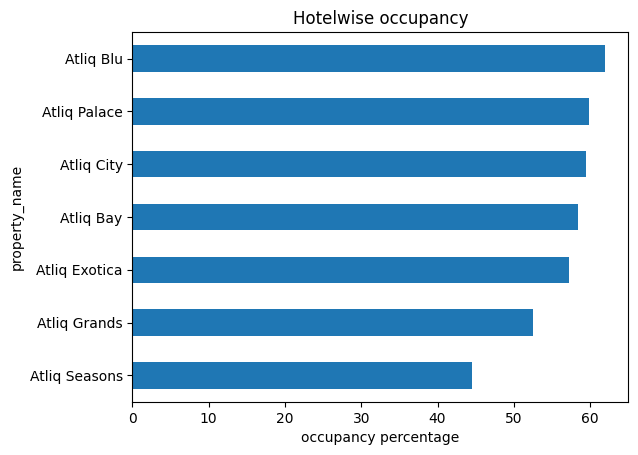

In [ ]:
pd.DataFrame(hotel_occ['occupancy percentage']).sort_values(by='occupancy percentage').plot(kind='barh',legend=False)
plt.xlabel('occupancy percentage')
plt.title('Hotelwise occupancy')

In [ ]:
# daywise occupancy
b['day_name']=b['date'].dt.day_name()
b['day']=b['date'].dt.day_of_week
b.head()

,date,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,day_name,day
0,2022-05-01,22-May,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT1,18,19,Sunday,6
1,2022-05-01,22-May,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT2,21,22,Sunday,6
2,2022-05-01,22-May,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT3,8,8,Sunday,6
3,2022-05-01,22-May,W 19,weekend,16558,Atliq Grands,Luxury,Delhi,2022-05-01,RT4,3,3,Sunday,6
4,2022-05-01,22-May,W 19,weekend,16559,Atliq Exotica,Luxury,Mumbai,2022-05-01,RT1,25,30,Sunday,6


In [ ]:
b1=b.groupby(['day_name','day']).agg({'successful_bookings':'sum','capacity':'sum'})
b1['occupancy percentage']=b1['successful_bookings']*100/b1['capacity']
b1

,,successful_bookings,capacity,occupancy percentage
day_name,day,,,
Friday,4,16908,32864,51.448393
Monday,0,16901,32864,51.427093
Saturday,5,24266,32864,73.837634
Sunday,6,24308,32864,73.965433
Thursday,3,16869,32864,51.329722
Tuesday,1,16811,32864,51.153238
Wednesday,2,16876,32864,51.351022


Text(0.5, 1.0, 'Daywise Occupancy percentage')

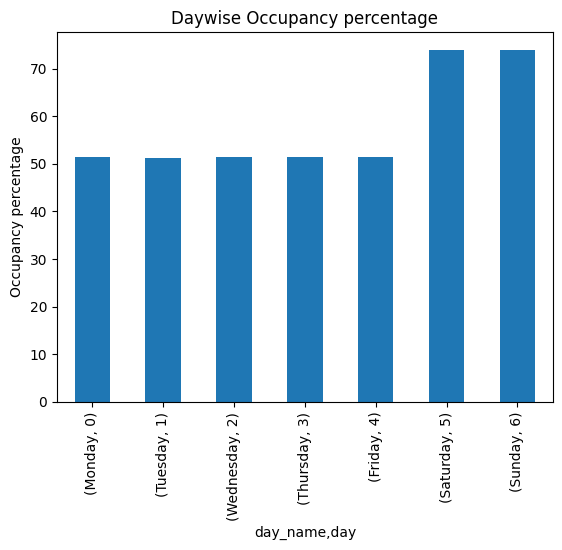

In [ ]:
pd.DataFrame(b1.sort_values(by='day')['occupancy percentage']).plot(kind='bar',legend=False)
plt.ylabel('Occupancy percentage')
plt.title('Daywise Occupancy percentage')

In [ ]:
# Room Categorywise Occupancy
x1=pd.merge(dim_rooms,b,how='left',left_on='room_id',right_on='room_category')
x2=x1.groupby(['room_class']).agg({'successful_bookings':'sum','capacity':'sum'})
x2['occupancy']=x2['successful_bookings']*100/x2['capacity']
x2

,successful_bookings,capacity,occupancy
room_class,,,
Elite,48916,84994,57.552298
Premium,30186,52507,57.489478
Presidential,15876,26845,59.139505
Standard,37961,65702,57.777541


Text(0.5, 1.0, 'Room Category wise occupancy')

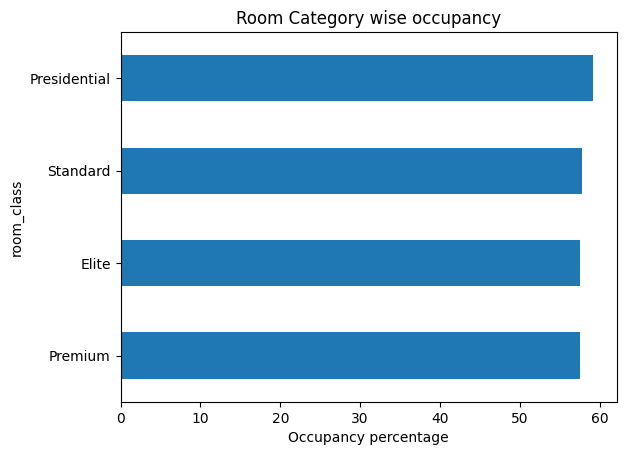

In [ ]:
pd.DataFrame(x2['occupancy']).sort_values(by='occupancy').plot(kind='barh',legend=False)
plt.xlabel('Occupancy percentage')
plt.title('Room Category wise occupancy')

In [ ]:
# Weekly occupancy percentage
x3=b.groupby(['week no','property_name']).agg({'successful_bookings':'sum','capacity':'sum'}).reset_index()
x3['occupancy']=x3['successful_bookings']*100/x3['capacity']
x3

,week no,property_name,successful_bookings,capacity,occupancy
0,W 19,Atliq Bay,1745,2786,62.634602
1,W 19,Atliq Blu,1771,2674,66.230366
2,W 19,Atliq City,1897,2982,63.615023
3,W 19,Atliq Exotica,1907,3115,61.219904
4,W 19,Atliq Grands,1411,2464,57.264610
...,...,...,...,...,...
86,W 31,Atliq City,1566,2982,52.515091
87,W 31,Atliq Exotica,1557,3115,49.983949
88,W 31,Atliq Grands,1130,2464,45.860390
89,W 31,Atliq Palace,1593,2996,53.170895


Text(0.5, 1.0, 'Weekly occupancy percentage')

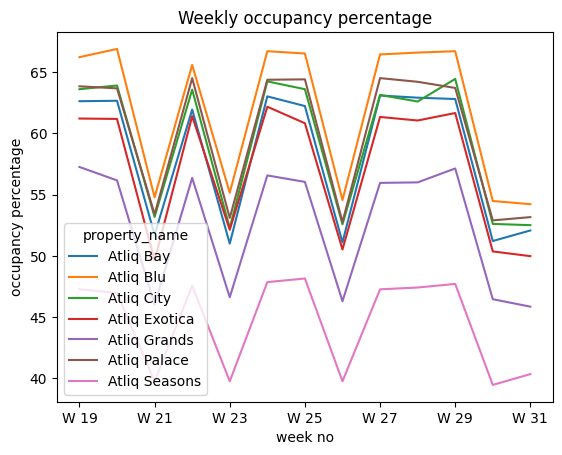

In [ ]:
x3.pivot(index='week no',columns='property_name',values='occupancy').plot(kind='line')
plt.ylabel('occupancy percentage')
plt.title('Weekly occupancy percentage')

In [ ]:
# Occupancy Trend
occ_trend=b.groupby(['week no']).agg({'successful_bookings':'sum','capacity':'sum'})
occ_trend['occupancy']=occ_trend['successful_bookings']*100/occ_trend['capacity']
occ_trend[['occupancy']]

,occupancy
week no,
W 19,61.963156
W 20,61.923599
W 21,51.096293
W 22,61.787975
W 23,51.361890
W 24,62.392631
W 25,61.838834
W 26,50.955018
W 27,61.946203


Text(0.5, 1.0, 'Weekly Occupancy Trend')

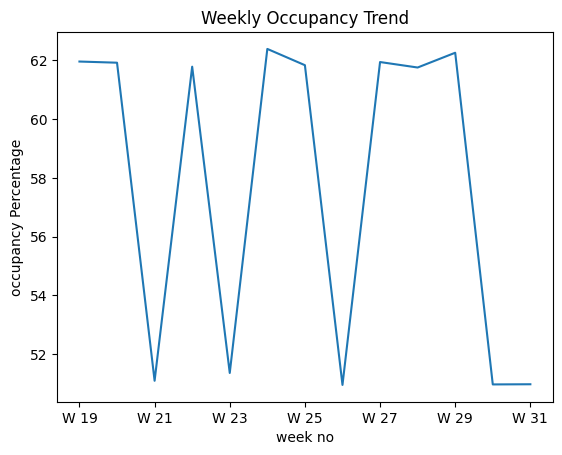

In [ ]:
occ_trend[['occupancy']].plot(kind='line',legend=False)
plt.ylabel('occupancy Percentage')
plt.title('Weekly Occupancy Trend')

In [ ]:
# Average days of stay
stay_df=df[df['booking_status']=='Checked Out']
stay_df['days_stayed']=(stay_df['checkout_date'] - df['check_in_date']) / np.timedelta64(1, 'D')
stay_df.groupby(['property_name']).agg({'days_stayed':'mean'}).sort_values(by='days_stayed')

<ipython-input-50-92a8700c1768>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stay_df['days_stayed']=(stay_df['checkout_date'] - df['check_in_date']) / np.timedelta64(1, 'D')


,days_stayed
property_name,
Atliq City,1.769141
Atliq Seasons,1.775525
Atliq Palace,1.780184
Atliq Grands,2.729646
Atliq Bay,2.743735
Atliq Exotica,2.753156
Atliq Blu,2.773367


Text(0.5, 1.0, 'Hotelwise Avergae days of stay')

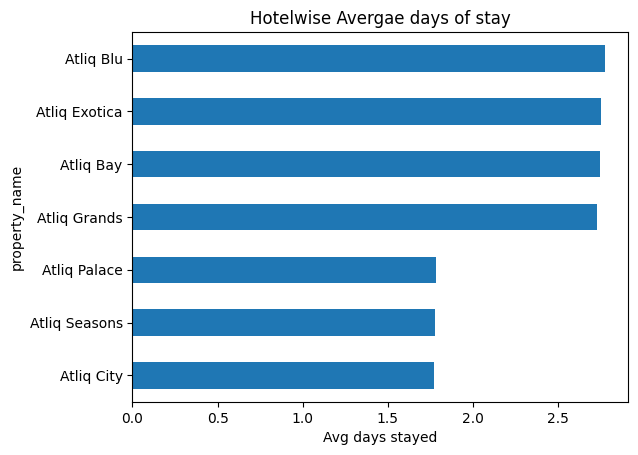

In [ ]:
stay_df.groupby(['property_name']).agg({'days_stayed':'mean'}).sort_values(by='days_stayed').plot(kind='barh',legend=False)
plt.xlabel('Avg days stayed')
plt.title('Hotelwise Avergae days of stay')

Text(0.5, 1.0, 'Hotel wise ADR(Average Daily Revenue)')

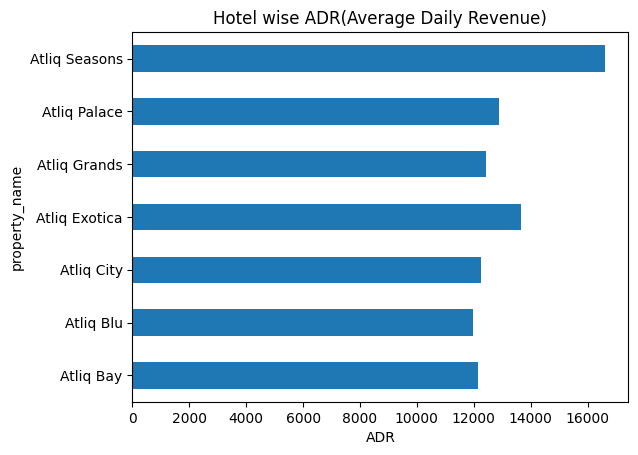

In [ ]:
ADR=df.groupby(['property_name']).agg({'booking_id':'nunique','revenue_realized':'sum'}).rename(columns={'booking_id':'Total Bookings','revenue_realized':'Revenue'})
ADR['ADR']=ADR['Revenue']/ADR['Total Bookings']
ADR['ADR']=ADR['ADR'].round(0)
ADR['ADR'].plot(kind='barh')
plt.xlabel('ADR')
plt.title('Hotel wise ADR(Average Daily Revenue)')